In [1]:
from tme3 import *
from mltools import *

check_fonctions()

In [2]:
def report(X, y, f_loss, f_grad, eps, max_iter):
    """Affiche 2 graphiques :
    - Frontière de décision
    - Fonction de coût dans l'espace des poids ainsi que la trajectoire suivie par
    l'algorithme d'optimisation
    """
    # Frontière de décision
    w, liste_w, _ = descente_gradient(X, y, f_loss, f_grad, eps, max_iter)
    plot_frontiere(X, lambda x: np.sign(x.dot(w)), step=100)
    plot_data(X, y)
    plt.title("Frontière de décision")
    plt.show()    

    ## Visualisation de la fonction de coût en 2D
    grid, x_grid, y_grid = make_grid()
    plt.figure()
    plt.contourf(
        x_grid,
        y_grid,
        np.array([f_loss(w, X, y).mean() for w in grid]).reshape(x_grid.shape),
        levels=20,
    )
    plt.scatter(liste_w[:, 0], liste_w[:, 1], c="r", marker="+", s=5)
    plt.title("Fonction de coût dans l'espace des poids")
    plt.show()


def plot_eps(X, y, f_loss, f_grad, eps, max_iter):
    """Etude du pas d'apprentissage."""
    for eps in [1e-10, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1]:
        w, _, loss = descente_gradient(X, y, f_loss, f_grad, eps, max_iter)
        plt.plot(loss, label=f"$\epsilon={eps:.0e}$")
    plt.legend()
    plt.title("Evolution du coût en fonction du nombre d'itérations")
    plt.show()


## Données linéairement séparables

(mélange de 2 gaussiennes)


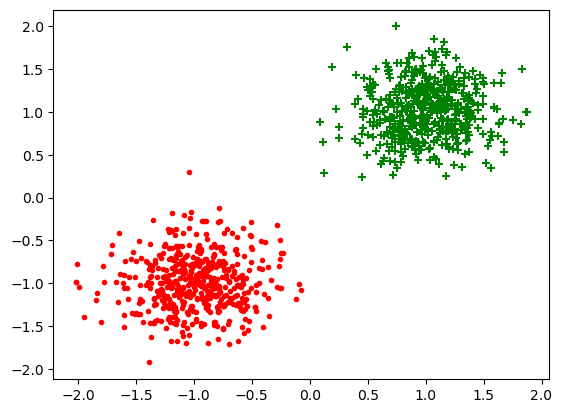

In [3]:
X, y = gen_arti(nbex=1000, data_type=0, epsilon=0.02)
plot_data(X, y)


### MSE


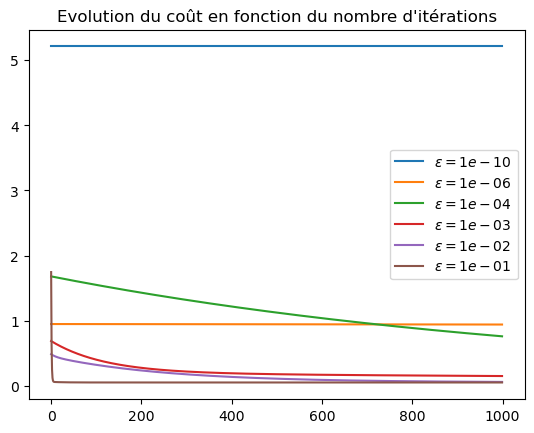

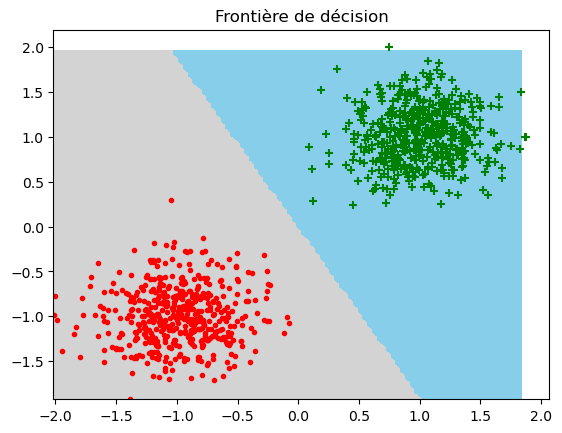

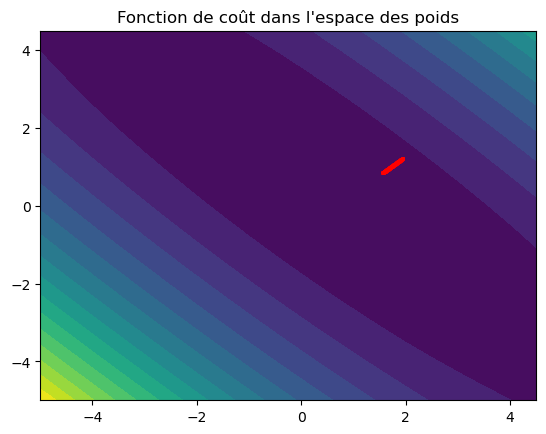

In [4]:
plot_eps(X, y, mse, mse_grad, 1e-4, 1000)
report(X, y, mse, mse_grad, 1e-4, 1000)


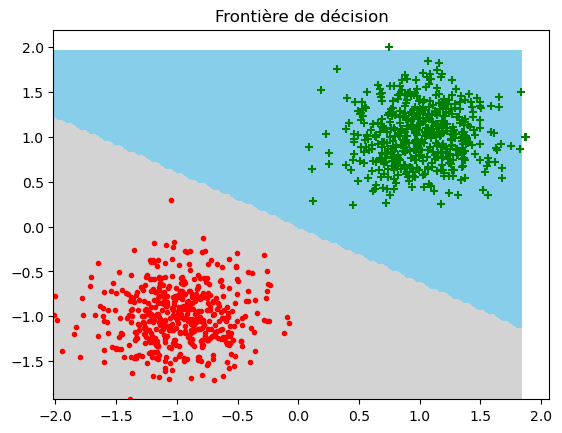

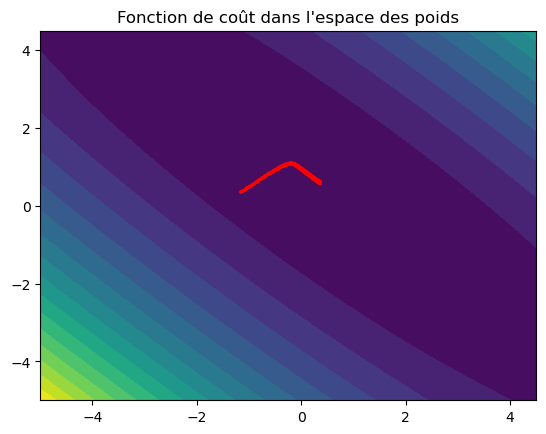

In [5]:
report(X, y, mse, mse_grad, 1e-2, 1000)


### Régression logistique


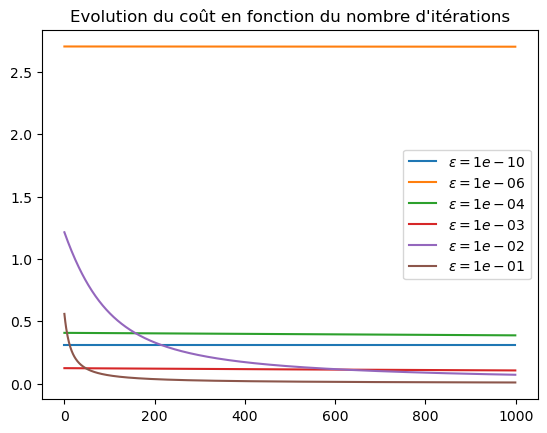

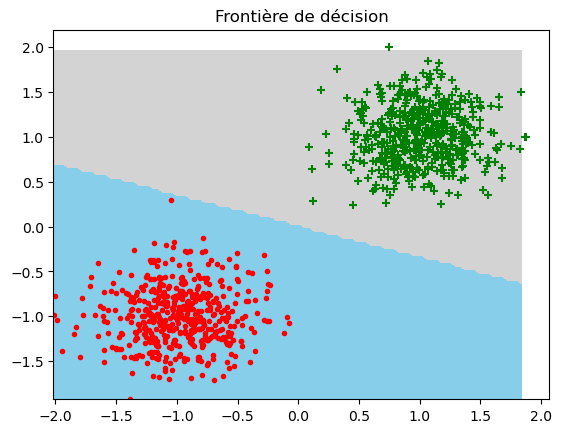

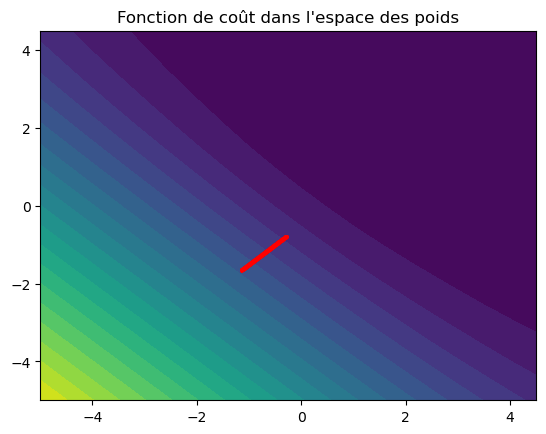

In [6]:
plot_eps(X, y, reglog, reglog_grad, 1e-3, 1000)
report(X, y, reglog, reglog_grad, 1e-3, 1000)


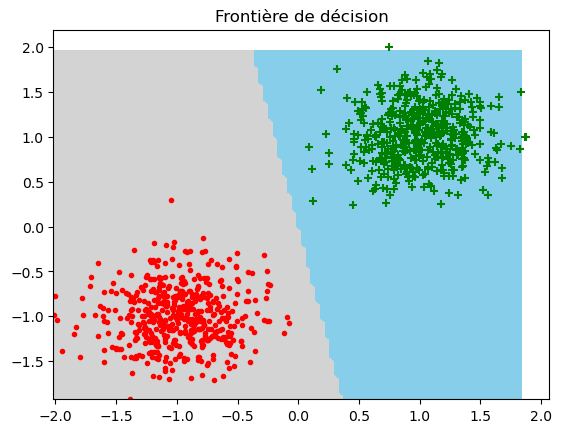

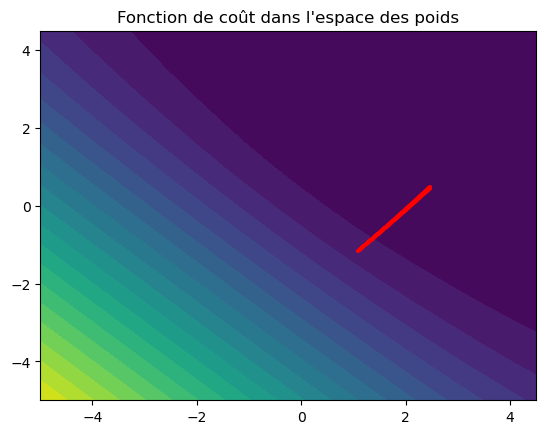

In [7]:
report(X, y, reglog, reglog_grad, 1e-2, 1000)


## Données non linéairement séparables

(mélange de 4 gaussiennes)


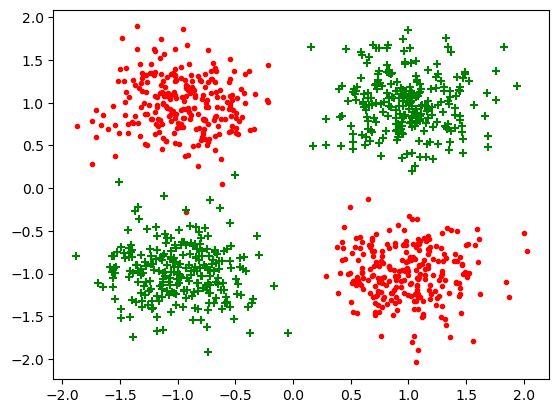

In [8]:
X, y = gen_arti(nbex=1000, data_type=1, epsilon=0.02)
plot_data(X, y)


### MSE


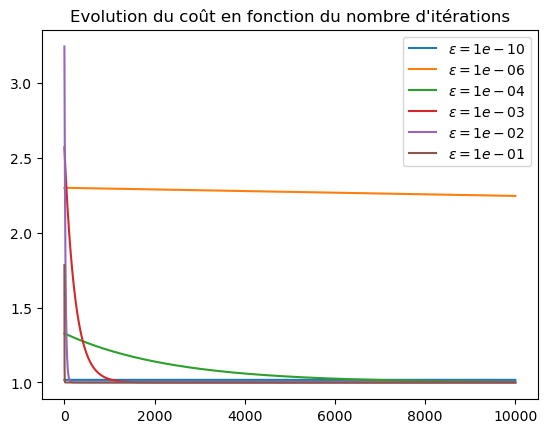

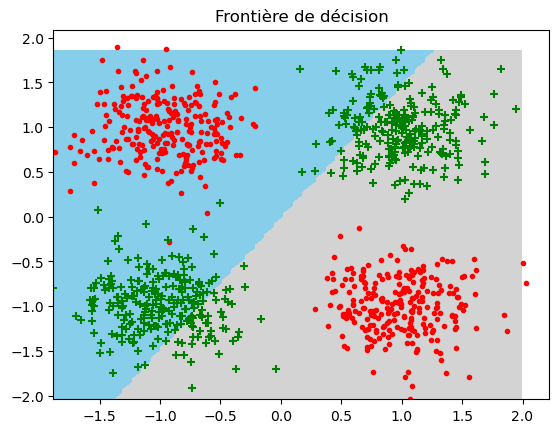

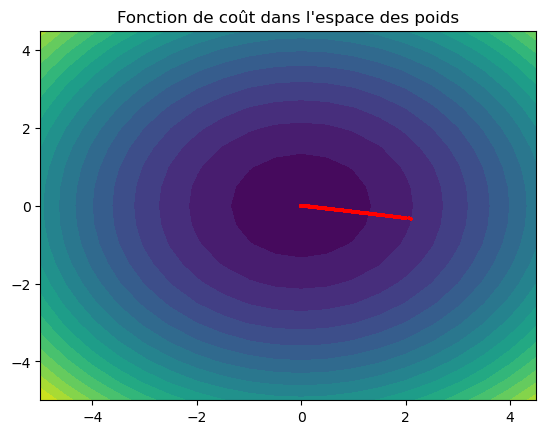

In [9]:
plot_eps(X, y, mse, mse_grad, 1e-2, 10000)
report(X, y, mse, mse_grad, 1e-2, 10000)


### Régression logistique


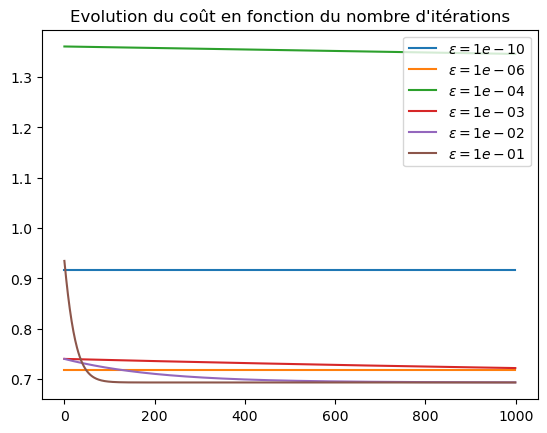

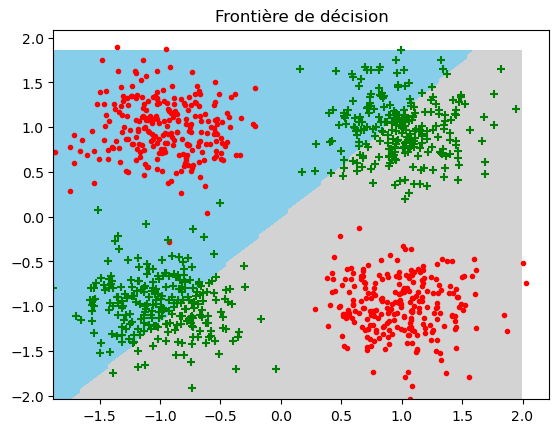

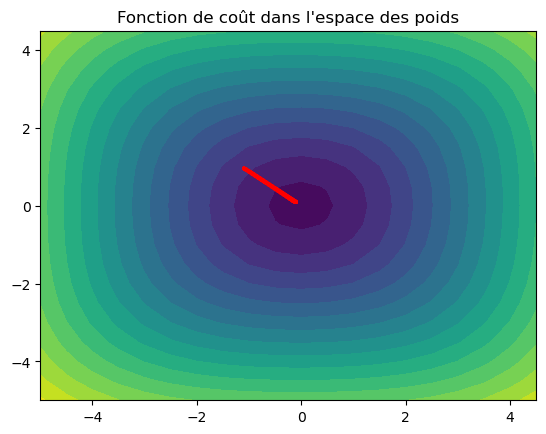

In [10]:
plot_eps(X, y, reglog, reglog_grad, 1e-2, 1000)
report(X, y, reglog, reglog_grad, 1e-2, 1000)


## Echequier


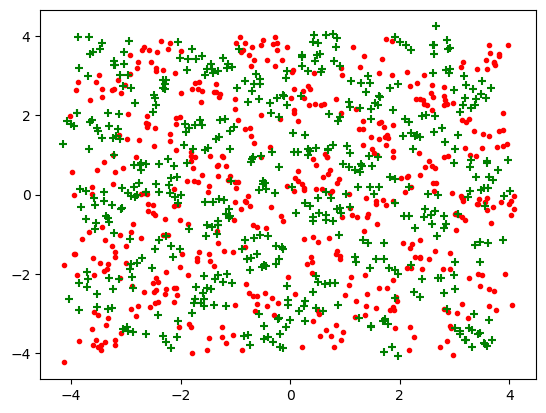

In [11]:
X, y = gen_arti(epsilon=0.1, data_type=2)
plot_data(X, y)


### MSE


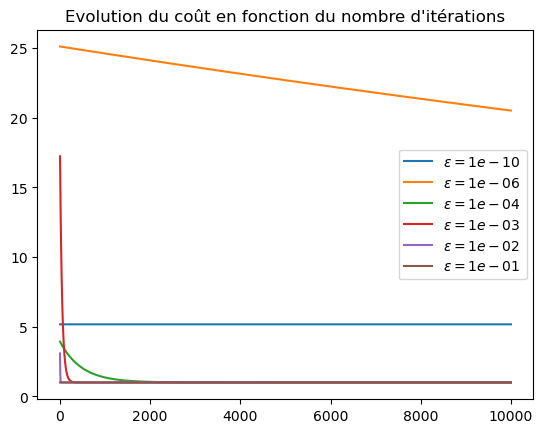

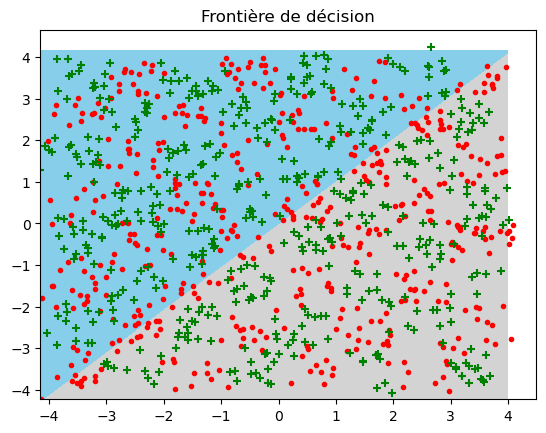

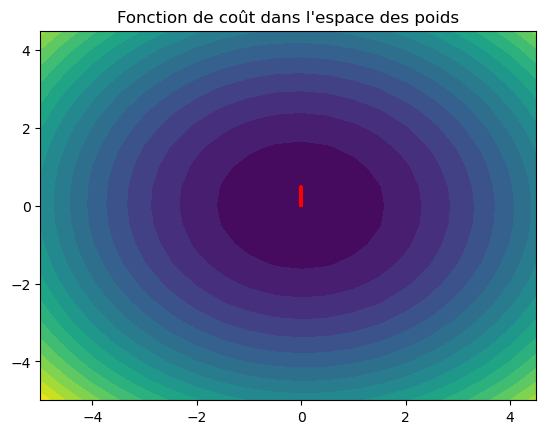

In [12]:
plot_eps(X, y, mse, mse_grad, 1e-2, 10000)
report(X, y, mse, mse_grad, 1e-2, 10000)


### Régression logistique


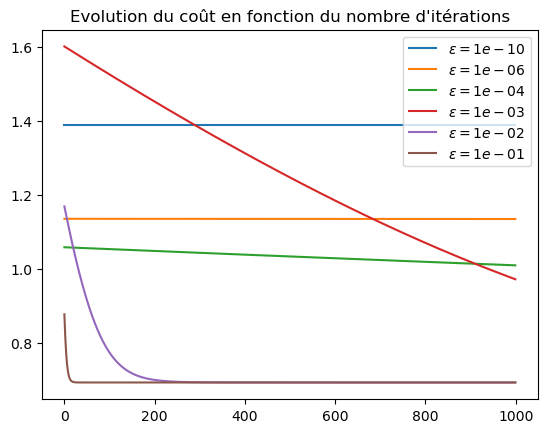

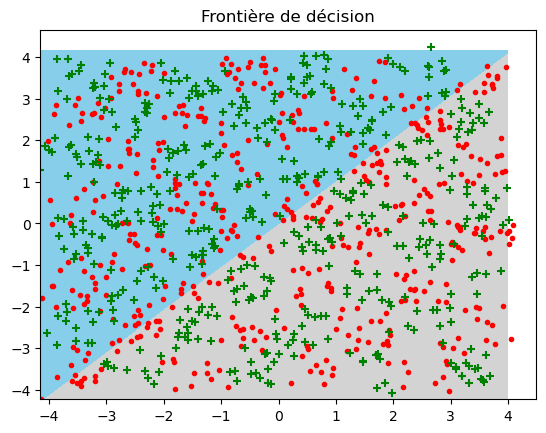

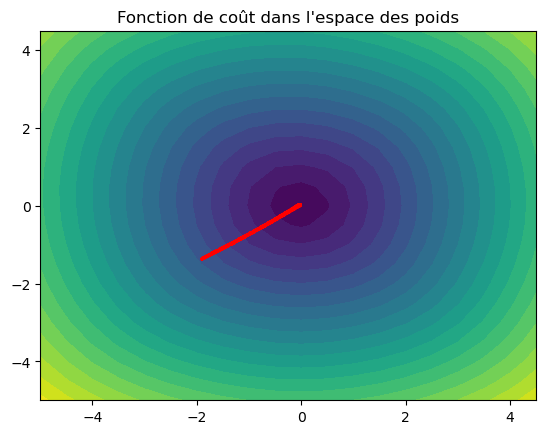

In [13]:
plot_eps(X, y, reglog, reglog_grad, 1e-2, 1000)
report(X, y, reglog, reglog_grad, 1e-2, 1000)
